<a href="https://colab.research.google.com/github/Aditya034DS/Data-Analytics/blob/main/sms_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

import nltk

import seaborn as sns

from nltk.corpus import stopwords

import string

from nltk.stem import PorterStemmer

from wordcloud import WordCloud

from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [ ]:
x = pd.read_csv("/content/sms-spam.csv")
x

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
x.shape

(5572, 5)

## Data Cleaning

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
x.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)
x

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
x.rename(columns = {'v1':'result', 'v2':'input'}, inplace=True)
x

,result,input
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
encoder = LabelEncoder()
x['result'] = encoder.fit_transform(x['result'])
x.head()

,result,input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
x.isnull().sum()

,0
result,0
input,0


In [ ]:
x.duplicated().sum()

403

In [ ]:
x = x.drop_duplicates(keep='first')
x

,result,input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


## EDA - Exploratory Data Analysis

In [ ]:
x['result'].value_counts()

,count
result,
0,4516
1,653


In [ ]:
653*100.0/5169 #calculating the percentage of spam sms where 652 is spam and 5169 is total sms

12.633004449603405

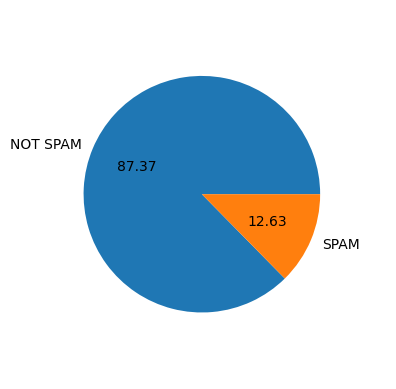

In [ ]:
plt.pie(x['result'].value_counts(),  labels = ['NOT SPAM', 'SPAM'], autopct = '%0.2f', radius = 0.8)
plt.show()

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
x['countCharacters'] = x['input'].apply(len)
x['countWords'] = x['input'].apply(lambda i:len(nltk.word_tokenize(i)))
x['countSentences'] = x['input'].apply(lambda i:len(nltk.sent_tokenize(i)))


<ipython-input-15-450e07337092>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['countCharacters'] = x['input'].apply(len)
<ipython-input-15-450e07337092>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['countWords'] = x['input'].apply(lambda i:len(nltk.word_tokenize(i)))
<ipython-input-15-450e07337092>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

In [ ]:
x.head()

,result,input,countCharacters,countWords,countSentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
x[['countCharacters', 'countWords', 'countSentences']].describe()

,countCharacters,countWords,countSentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
x[x['result'] == 0][['countCharacters', 'countWords', 'countSentences']].describe()

,countCharacters,countWords,countSentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
x[x['result'] == 1][['countCharacters', 'countWords', 'countSentences']].describe()

,countCharacters,countWords,countSentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='countCharacters', ylabel='Count'>

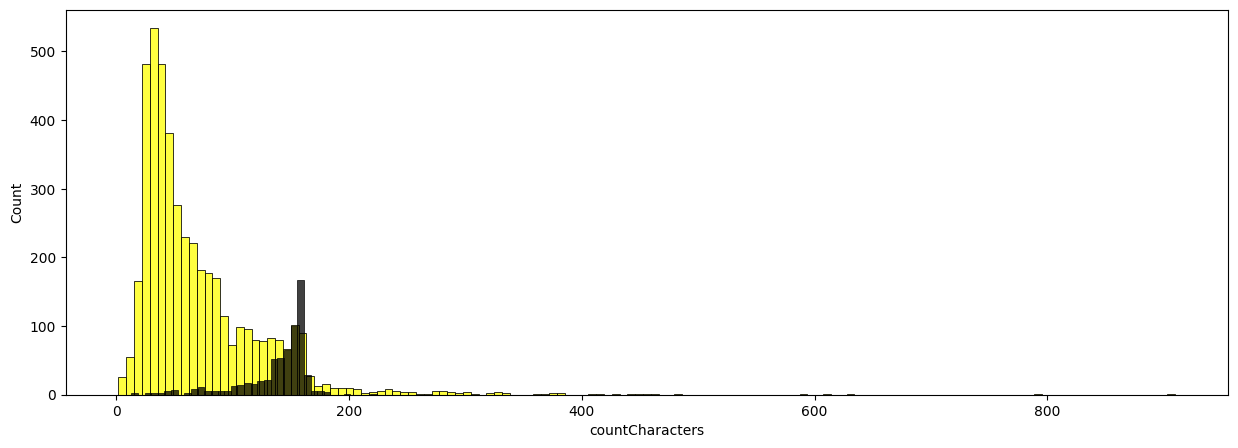

In [ ]:
plt.figure(figsize = (15, 5))
sns.histplot(x[x['result'] == 0]['countCharacters'], color = "yellow")
sns.histplot(x[x['result'] == 1]['countCharacters'], color = "black")

<Axes: xlabel='countWords', ylabel='Count'>

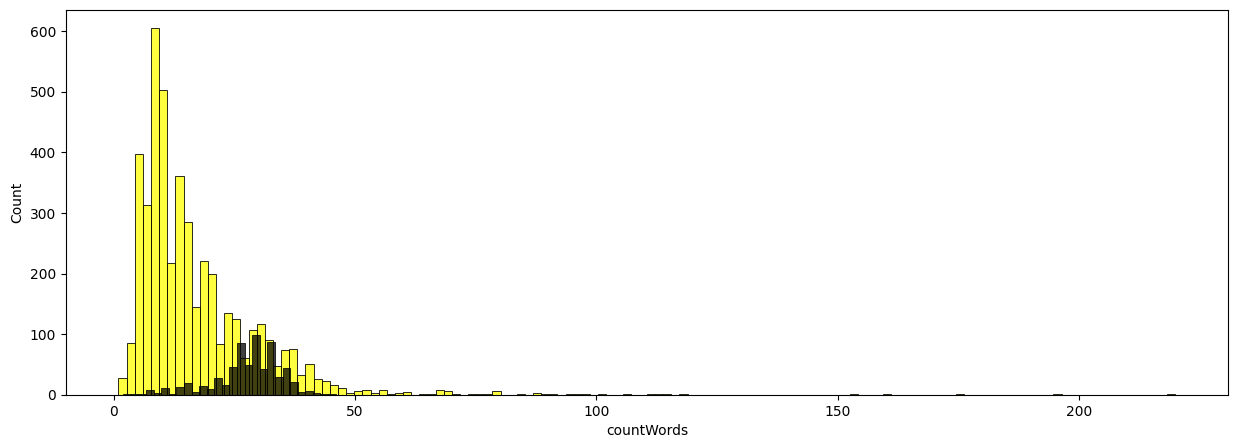

In [ ]:
plt.figure(figsize = (15, 5))
sns.histplot(x[x['result'] == 0]['countWords'], color = "yellow")
sns.histplot(x[x['result'] == 1]['countWords'], color = "black")

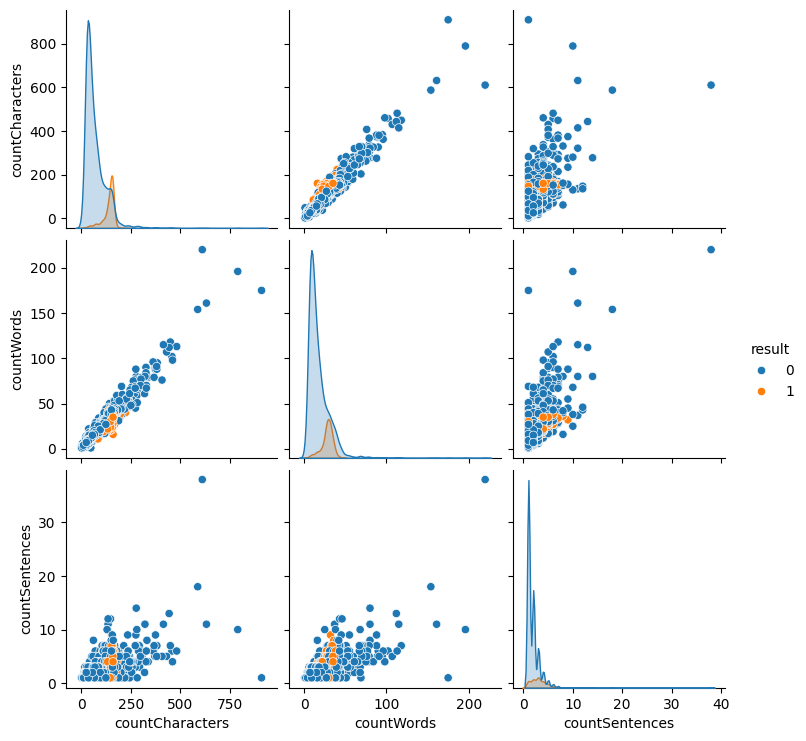

In [ ]:
sns.pairplot(x, hue='result')

In [ ]:
import pandas as pd
import numpy as np

numerical_x = x.select_dtypes(include=np.number)
correlation_matrix = numerical_x.corr()
print(correlation_matrix)

                   result  countCharacters  countWords  countSentences
result           1.000000         0.384717    0.262912        0.263939
countCharacters  0.384717         1.000000    0.965760        0.624139
countWords       0.262912         0.965760    1.000000        0.679971
countSentences   0.263939         0.624139    0.679971        1.000000


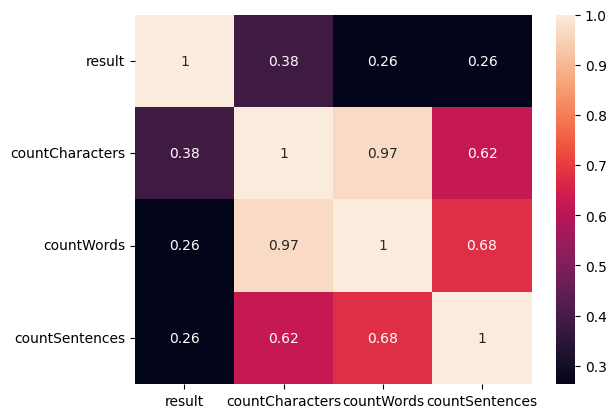

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True)
plt.show()

## Data Preprocessing

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def transform_text (text):

    text = text.lower()
    text = nltk.word_tokenize(text)


    removedSC = list()
    for i in text:
        if i.isalnum():
            removedSC.append(i)

    text = removedSC[:]
    removedSWPC = list()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            removedSWPC.append(i)

    text = removedSWPC[:]
    ps = PorterStemmer()
    stemmed = list()
    for i in text:
        stemmed.append(ps.stem(i))

    text = stemmed[:]

    return " ".join(text)

In [ ]:
x['processed'] = x['input'].apply(transform_text)
x.head()

<ipython-input-27-89c0703713c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['processed'] = x['input'].apply(transform_text)


,result,input,countCharacters,countWords,countSentences,processed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

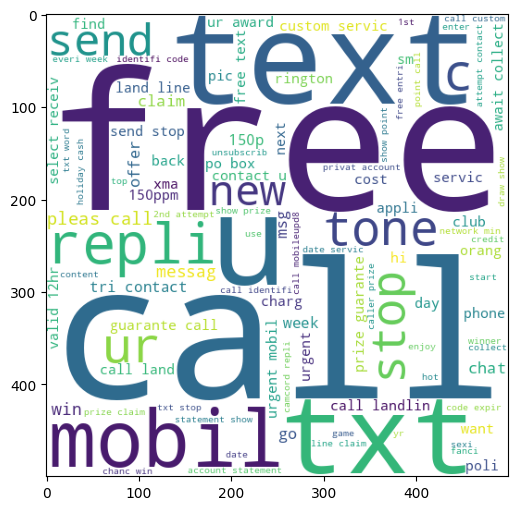

In [ ]:
spamWC = wc.generate(x[x['result'] == 1]['processed'].str.cat(sep=" "))
plt.figure(figsize=(12, 6))
plt.imshow(spamWC)

In [ ]:
spamWords = list()
for msg in x[x['result'] == 1]['processed'].tolist():
  for word in msg.split():
    spamWords.append(word)

spamWords

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [ ]:
spamWordsDictionary = Counter(spamWords)
spamWordsDictionary.most_common(40)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45),
 ('custom', 42),
 ('messag', 42),
 ('guarante', 42),
 ('per', 41),
 ('chat', 38),
 ('tri', 37),
 ('msg', 35),
 ('draw', 35),
 ('number', 35),
 ('cs', 35)]

In [ ]:
mostCommonSPAM = pd.DataFrame(spamWordsDictionary.most_common(40))

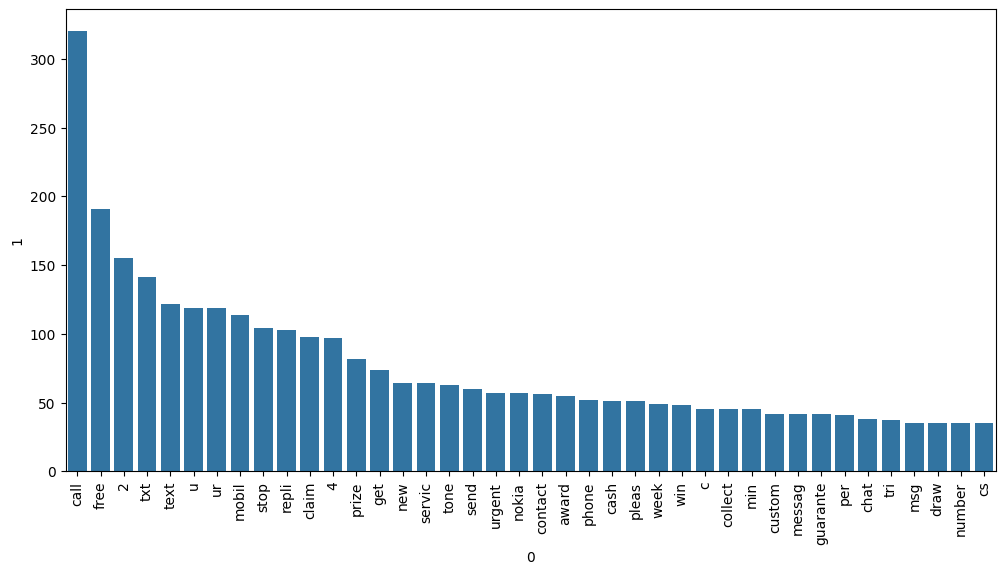

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data = mostCommonSPAM, x=0, y=1)
plt.xticks(rotation='vertical')
plt.show()

## Model Building

In [ ]:
cv = CountVectorizer()

In [ ]:
X = cv.fit_transform(x['processed']).toarray()
X.shape

(5169, 6708)

In [ ]:
y = x['result'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 49)

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8617021276595744
[[774 125]
 [ 18 117]]
0.4834710743801653


In [ ]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9700193423597679
[[882  17]
 [ 14 121]]
0.8768115942028986


In [ ]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9642166344294004
[[893   6]
 [ 31 104]]
0.9454545454545454


In [ ]:
tf = TfidfVectorizer()
X = tf.fit_transform(x['processed']).toarray()
y = x['result'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 49)

In [ ]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8597678916827853
[[775 124]
 [ 21 114]]
0.4789915966386555


In [ ]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9574468085106383
[[899   0]
 [ 44  91]]
1.0


In [ ]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9642166344294004
[[893   6]
 [ 31 104]]
0.9454545454545454


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.960348162475822
Precision -  0.9519230769230769
For  KN
Accuracy -  0.8974854932301741
Precision -  1.0
For  NB
Accuracy -  0.9574468085106383
Precision -  1.0
For  DT
Accuracy -  0.9410058027079303
Precision -  0.8245614035087719
For  LR
Accuracy -  0.9458413926499033
Precision -  0.9072164948453608
For  RF
Accuracy -  0.9642166344294004
Precision -  1.0


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9545454545454546
Precision -  0.9
For  BgC
Accuracy -  0.960348162475822
Precision -  0.873015873015873
For  ETC
Accuracy -  0.971953578336557
Precision -  1.0
For  GBDT
Accuracy -  0.9497098646034816
Precision -  0.9191919191919192


In [ ]:
performance = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance

,Algorithm,Accuracy,Precision
1,KN,0.897485,1.000000
2,NB,0.957447,1.000000
5,RF,0.964217,1.000000
8,ETC,0.971954,1.000000
0,SVC,0.960348,0.951923
9,GBDT,0.949710,0.919192
4,LR,0.945841,0.907216
6,AdaBoost,0.954545,0.900000
7,BgC,0.960348,0.873016
3,DT,0.941006,0.824561


In [ ]:
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [ ]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('rf', rfc), ('nb', mnb), ('et', etc)],voting='soft')

In [ ]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9661508704061895
Precision 1.0


In [ ]:
estimators=[('rf', rfc), ('nb', mnb), ('et', etc)]
final_estimator=ExtraTreesClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9845261121856866
Precision 0.976


In [ ]:
import pickle

# Save the trained model
with open('smsetc_model.pkl', 'wb') as model_file:
    pickle.dump(etc, model_file)

# Save the vectorizer (e.g., TfidfVectorizer or CountVectorizer)
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tf, vectorizer_file)

print("Model and vectorizer saved!")


Model and vectorizer saved!
